# ***Assignment 3: Land-Surface Changes in Precipitation and Temperature***
This assignment is due on 2025-10-16. Please put your answers within this notebook and share the completed notebook with the TAs rishudh@stanford.edu and jmells@stanford.edu using the "Share" banner located at the top right corner of this notebook. When sharing your notebook, please change the name of the notebook and add your name and sunetid (e.g., tpp_assignment_3_firstname_lastname_sunetid.ipynb) For help submitting, see the canvas walkthrough. If you are still having technical difficulties, email us before the deadline.

###**INTRODUCTION TO THE ASSIGNMENT**

In this assignment, we will explore the changes occurring on the land surface in response to climate change and consider these changes in the context of sustainability.

###**DATA SETS**
This week we will be working with datasets which contain precipitation & temperature data from 1981 to 2021. Both precipitation and temperature come from separate datasets, but we have combined them here for you.

The precipitation data is a reanalysis data set. A reanalysis data set is a data set that blends observations and climate models in an attempt to produce the most complete and accurate map of historical and recent climate data. Our precipitation data come from the ERA-5 data set made available by the European Centre for Medium-Range Weather Forecasts, which combines their own models with data from satellites using active and passive microwave sensors. For more information see: https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation#ERA5:datadocumentation

The temperature data also come from the ERA5 dataset linked above, which again combines models with satellite data. For temperature, ground-based observations are  also used. This particular temperature dataset is what the model predicts the air temperature will be 2 m above the land's surface.

###**Resolution**

1) Precipitation

>Temporal Resolution: Monthly

>Time Period: 1981-2021

>Spatial Extent: Global Land

>Spatial Resolution: 1 degree

>Unit: Meters

>
2) Land Surface Temperature

>Time Period: 1981-2021

>Temporal Resolution: Monthly

>Spatial Extent: Global Land

>Spatial Resolution: 1 degree

>Unit: Kelvin




###**TOOLBOX**

All the Python functions and packages you will use in this assignment are in the toolbox for the course. We add new tools to the toolbox with each assignment as new ways of analyzing and visualizing data are introduced.

https://colab.research.google.com/drive/13fyY9kGgWaSLnF1jhpF9yM3Bgj79ecbw?usp=sharing

We will use the libraries numpy, pandas, matplotlib, xarray, cartopy, datetime to analyze this data (more information about these in the above linked toolbox).

###**THE LEARNING GOALS FOR THE WEEK**

● learn about the ways in which climate change and human activity are impacting planet Earth, *with a focus this week in using data analysis to determine changes in precipitation and surface temperature patterns.*

● become familiar with the wide range of (primarily satellite) sensors available to study various components of the Earth system. *This week we will work with reanalysis data sets, that integrate measurements from satellites through models.*

● become familiar with the basic physical principles (resolution, sampling, processing workflows, etc.) common to all sensors, *working this week with two data sets.*

● work with various sources of data, learning how to access, analyze, synthesize, and describe the data to quantify trends; think critically and creatively about how to project these trends into the future. *You will design your own workflow, using your choice of data analysis methods and tools to explore the changes in precipitation and temperature.*

● describe the complex interactions between human activity and various components of the Earth system, this week framing this under the heading of sustainability, where the component of the Earth system is the land surface. *We will consider: how are the changes in precipitation and temperature introducing sustainability challenges in different countries? How are human activities amplifying the negative impacts? How could human activity mitigate the negative effects?*

## **In Class Set Up for Assignment**

#### 1) **Install and Import Packages**: redivis, numpy, pandas, matplotlib, xarray, cartopy, widgets, and datetime (See Toolbox)

In [ ]:
#---Install Packages---
# copy this block verbatum. no changes needed.
!pip install redivis xarray numpy pandas geopandas cartopy ipywidgets rioxarray &> /dev/null
!pip install shapely --no-binary shapely &> /dev/null

In [ ]:
#---Import Packages---
# copy this block verbatum. no changes needed.
import redivis
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import cartopy.crs as ccrs
import cartopy.feature as cf
import datetime
from ipywidgets import widgets, interact
from shapely.geometry import mapping
matplotlib.rcParams['font.size'] = 14

### 2) **Downloading and Reviewing the Data**
Run the following code cell to load the data into a variable called *temp_precip_data*.

In [ ]:
user = redivis.user("sdss")
dataset = user.dataset("geophysics_115_taking_the_pulse_of_the_planet:fg2x:v1_3")

table_atmosphere = dataset.table("atmosphere_data:9be7")
table_global = dataset.table("global_water_temp_pop_data:cqdz")

# Load table as a dataframe
df_atmosphere = table_atmosphere.to_pandas_dataframe(max_results=100)
df_global = table_global.to_pandas_dataframe(max_results=100)

# This table contains file references, to download:
table_atmosphere.download_files('./taking_the_pulse_atmosphere_data/',overwrite=True)
table_global.download_files('./taking_the_pulse_global_data/',overwrite=True)

gdf_boundaries = gpd.read_file("./taking_the_pulse_atmosphere_data/world-administrative-boundaries.geojson")
temp_precip_data = xr.load_dataset("./taking_the_pulse_global_data/global_temp_and_precip.nc")

Please visit the URL below to authenticate with your Redivis account:
https://redivis.com/oauth/authorize?user_code=fc88a30f72f21d3f606ee7fb6f7ca69d


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ? files/s]

0.00 (?B/s)

  0%|          | 0/12 [00:00<?, ? files/s]

0.00 (?B/s)

In [ ]:
temp_precip_data

<xarray.Dataset> Size: 510MB
Dimensions:              (time: 492, y: 180, x: 360)
Coordinates:
  * time                 (time) datetime64[ns] 4kB 1981-01-01 ... 2021-12-01
  * y                    (y) float64 1kB 89.5 88.5 87.5 ... -87.5 -88.5 -89.5
  * x                    (x) float64 3kB -179.5 -178.5 -177.5 ... 178.5 179.5
Data variables:
    temperature_2m       (time, y, x) float64 255MB nan nan nan ... 245.5 245.5
    total_precipitation  (time, y, x) float64 255MB nan nan ... 0.0003444
Attributes:
    transform:               [   1.    0. -180.    0.   -1.   90.]
    crs:                     +init=epsg:4326
    res:                     [1. 1.]
    is_tiled:                1
    nodatavals:              -32768.0
    scales:                  1.0
    offsets:                 0.0
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

## **The Start of Assignment: Data Analysis and Questions to Complete**

#### **1) HOW DOES A CHANGE IN VISUALIZING DATA AFFECT THE MESSAGE?**


#### **a) In Class (discuss & work in groups):** Explore the dataset. Consider visualizing *precipitation* and *temperature* data at a point in time to get an understanding of what you are working with. Include cmap=’hot_r’ for this first part.

Text(0.5, 0, 'Longitude')

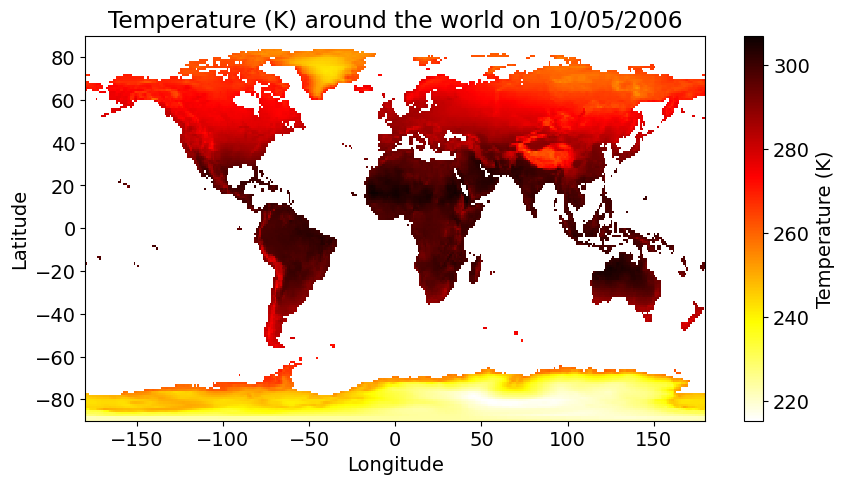

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))                                                                        #establishes a figure and sets the size
temp_global = temp_precip_data.temperature_2m.sel(time='10-05-2006', method='nearest')
temp_global.plot(cmap = 'hot_r', ax=ax, add_colorbar=True, cbar_kwargs={'label': 'Temperature (K)'})
ax.set_title("Temperature (K) around the world on 10/05/2006")
ax.set_ylabel("Latitude")
ax.set_xlabel("Longitude")

Text(0.5, 0, 'Longitude')

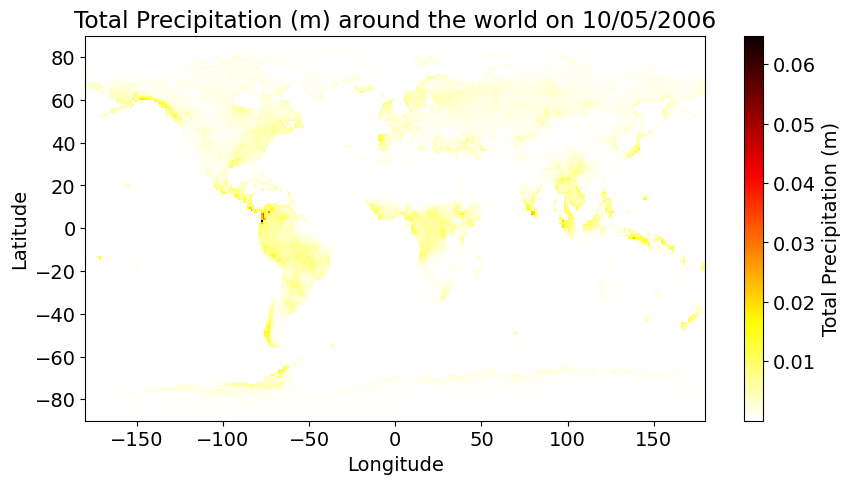

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))                                                                        #establishes a figure and sets the size
precipitation_global = temp_precip_data.total_precipitation.sel(time='10-05-2006', method='nearest')
precipitation_global.plot(cmap = 'hot_r', ax=ax, add_colorbar=True, cbar_kwargs={'label': 'Total Precipitation (m)'})
ax.set_title("Total Precipitation (m) around the world on 10/05/2006")
ax.set_ylabel("Latitude")
ax.set_xlabel("Longitude")

#### **b) In Class (discuss & work in groups):** What do you notice about the plots from part a? Are they equally effective at communicating the data? Why or why not? (1-4 sentences)

No, they aren't equally effective at communicating the data. It is much harder to see the precipitation data, and the colors do not reflect our typical intuition associated with more or less precipitation. For this, we should change the color bar so that the areas with more precipitation are blue and those with less are red.

Unlike the temperature map, we also see that most of the areas in the world lie within the lower part of the color scale (i.e., have less precipitation). This makes it difficult to really make meaning in the differences in precipitation levels across the globe in the places that do experience more precipitation. It would makes sense to eliminate outlier data to help better see this gradation and make meaning of it. Just generally having more intuitive colors and more contrast within the colors across different precipitation level would help make the graph more meaningful and legible, like the temperature one.

#### **c) In Class (discuss & work in groups):** Using the toolbox re-plot your **precipitation** data in a *new color* and a *new scale* that makes it more communicative.


Text(0.5, 0, 'Longitude')

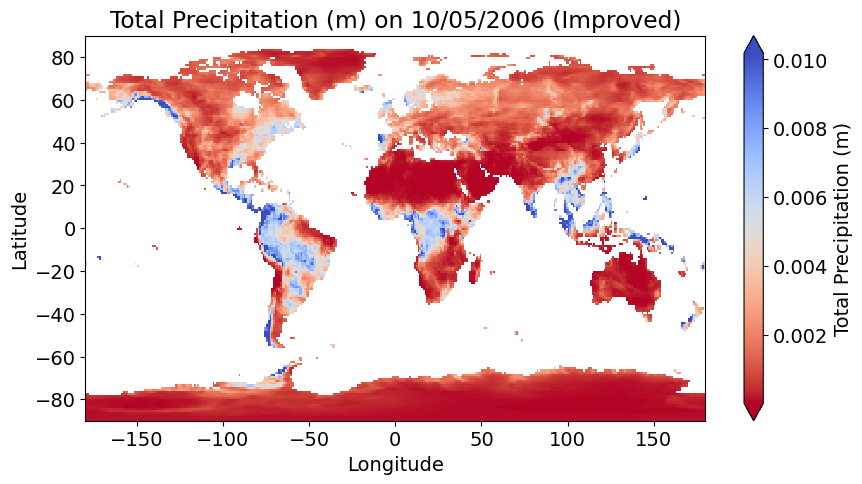

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))                                                                        #establishes a figure and sets the size
your_min_number = np.nanpercentile(precipitation_global
.values,1)
your_max_number = np.nanpercentile(precipitation_global
.values,99)
precipitation_global.plot(cmap = "coolwarm_r", vmin = your_min_number, vmax = your_max_number, cbar_kwargs={'label': 'Total Precipitation (m)'}, ax=ax)
ax.set_title("Total Precipitation (m) on 10/05/2006 (Improved)")
ax.set_ylabel("Latitude")
ax.set_xlabel("Longitude")

#### **d) Outside of Class:** What tradeoffs are you making when you modify the range of the color scale? When is it useful, when is it harmful? (1-2 sentences)



Getting rid of outliers (or precipitation levels that fall above the 99% and below the 1%) allows us to more easily see the differences in precipitation levels in most places/countries around the world, especially countries we care about. It eliminates most data from Antarctica and the north pole, which we care less about.

However, this could also accidentally get rid of precipitation data in places that are still relevant, including, for example, in deserts where there is not much rainfall or places where there is a lot of precipitation.

This is the tradeoff, eliminating some data to understand the rest in greater complexity but nonetheless still getting rid of some data.

#### **2) CHOOSE ONE COUNTRY - HOW ARE PRECIPITATION AND TEMPERATURE CHANGING?**


#### **a) In Class (discuss & work in groups):** Choose a country and plot the precipitation **OR** temperature across that country. We recommend choosing a larger country so that there are multiple pixels covering that country.

The following code, similar to Assignment 2, pulls data from a country out into its own dataset variable. Use the drop down to find the formulation of country names in the dataset. These must match exactly, so we recommend copying and pasting it into the country_name variable, as you may find some spelling or formatting discrepancies otherwise.

In [ ]:
gdf_boundaries = gpd.read_file("./taking_the_pulse_atmosphere_data/world-administrative-boundaries.geojson")
country_names = np.sort(gdf_boundaries.name.values)
gdf_boundaries = gdf_boundaries.set_index('name')
widget_country = widgets.Select(options=country_names)
widget_country

Select(options=('Abyei', 'Afghanistan', 'Aksai Chin', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Ango…

Whatever country you selected above can have its value outputted through the following code cell:

In [ ]:
widget_country.value

'Abyei'

We will create a copy of our original gridded data -- this is just so it's easier for us to manipulate.

In [ ]:
temp_precip_data_copy = xr.load_dataset("./taking_the_pulse_global_data/global_temp_and_precip.nc")

Use the 'temp_precip_data_copy' as your gridded data for plotting with country boundaries (see Toolbox) -- and remember to copy paste your country of interest from the widget above!

Text(0.5, 31.722222222222207, 'Longitude')

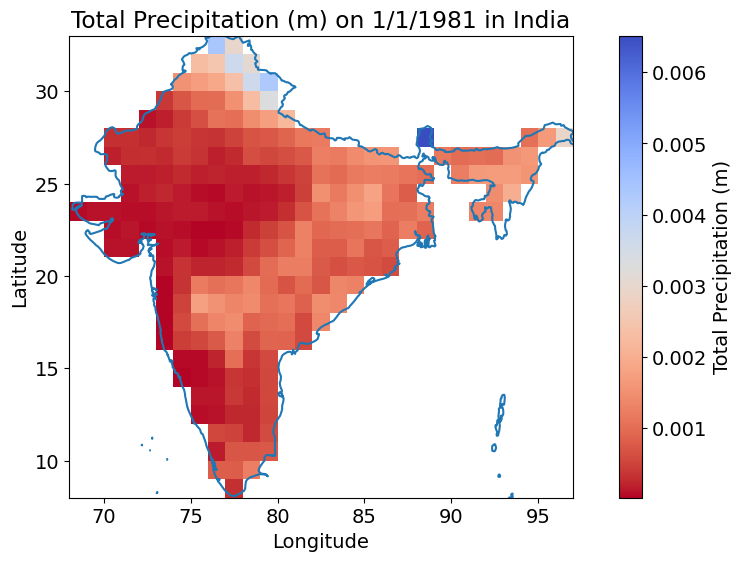

In [ ]:
#get our country boundaries
gdf_boundaries = gpd.read_file("./taking_the_pulse_atmosphere_data/world-administrative-boundaries.geojson")
country_names = np.sort(gdf_boundaries.name.values)
gdf_boundaries = gdf_boundaries.set_index('name')

#select country of interest
#you must spell the name exactly as they do in the file. we will give you a widget to help find the country name you're interested in
country_name = 'India'
country_boundary = gdf_boundaries.loc[[country_name]]
country_boundary.crs

#we have to use gridded data with a crs attribute
#im importing the data here, but you may have already done this step
#if you have already imported your data skip this line
your_gridded_data_with_crs = temp_precip_data_copy

#set your coordinate system to the country boundary
your_gridded_data_with_crs.rio.set_spatial_dims(x_dim="x", y_dim="y", inplace=True)
temp_precip_clipped = your_gridded_data_with_crs.rio.clip(
    country_boundary.geometry.apply(mapping),
    country_boundary.crs,
    drop=True
)

#plot the country we just selected for whatever time you may want to look at
fig,ax = plt.subplots(figsize=(12,6))                                                                        #establishes a figure and sets the size
country_boundary.boundary.plot(ax=ax)
temp_precip_clipped.total_precipitation.sel(time='1981-01-01', method = 'nearest').plot(cmap = 'coolwarm_r',cbar_kwargs={'label': 'Total Precipitation (m)'}, ax=ax)
ax.set_title("Total Precipitation (m) on 1/1/1981 in India")
ax.set_ylabel("Latitude")
ax.set_xlabel("Longitude")

#### **b) In Class (discuss & work in groups):** How is precipitation/temperature changing over time in your country? There are various ways of answering this question; we want you to use at least two different forms of data analysis. Go ahead and perform the data analysis that you need to answer this question.

# Precipitation

In [ ]:
# STRATEGY 1 - Using line plot/timeseries
precip_clipped_annual = temp_precip_clipped.resample(time='YE').sum()

In [ ]:
##### Function Code Block ########
##### you should not need to edit this code block ####

#run this code block to generate a function that we can use to take the linear fit
def linear_fit(time_series, data):
    # assume the time series has a regular sampling rate
    times = np.arange(len(time_series))
    G = np.c_[times, np.ones_like(times)]
    Pinv = np.linalg.pinv(G)
    m = Pinv.dot(data)
    predicted_data = G @ m
    slope = m[0,:]
    intercept = m[1,:]
    return predicted_data, slope, intercept

In [ ]:
# in this example we are using the data category 'total_precipitation'
# if you want to look at a different data category make sure to change this before running the code
your_data_grid = precip_clipped_annual.total_precipitation.data.reshape((precip_clipped_annual.total_precipitation.data.shape[0], np.prod(precip_clipped_annual.total_precipitation.data.shape[1:]))) # makes the 2d grid into a column vector where each index of the column is a location on the map
your_time_series = pd.to_datetime(precip_clipped_annual.time.data)                                                                            # pulls the time steps


total_precipitation_linear_fit, slope, intercept = linear_fit(your_time_series, your_data_grid)                                                           #makes linear fits for every location

# Add results back to precip_clipped_annual
precip_clipped_annual['slope'] = (("y", "x"), slope.reshape(precip_clipped_annual.total_precipitation.data.shape[1:]))                                        # makes a new 'slope' dataset in the dataframe
precip_clipped_annual['intercept'] = (("y", "x"), intercept.reshape(precip_clipped_annual.total_precipitation.data.shape[1:]))                                # makes a new 'intercept' dataset in the dataframe
precip_clipped_annual['total_precipitation_linear_fit'] = (("time", "y", "x"), total_precipitation_linear_fit.reshape(precip_clipped_annual.total_precipitation.data.shape))                  # incorperates the predicted points into the dataframe

# pulls out the date range and reformats it to a useful format for printing
time_min = pd.to_datetime(your_time_series).min().strftime('%Y-%m')
time_max = pd.to_datetime(your_time_series).max().strftime('%Y-%m')

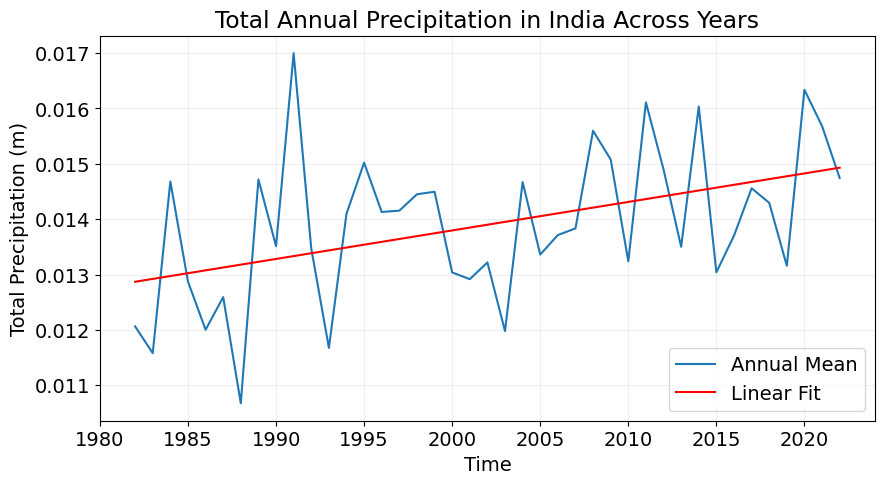

In [29]:
fig,ax = plt.subplots(figsize=(10,5))
precip_clipped_annual.total_precipitation.mean(dim = ['x','y']).plot(ax=ax, label = 'Annual Mean')
precip_clipped_annual.total_precipitation_linear_fit.mean(dim = ['x','y']).plot(ax=ax, color='red', label = 'Linear Fit') #plot linear fit
ax.grid(True, alpha=0.2)                        #sets a grid on your plot
ax.set_ylabel("Total Precipitation (m)")  #sets labels on your y axis
ax.set_xlabel("Time")   #sets labels on your x axis
ax.set_title("Total Annual Precipitation in India Across Years")
ax.legend()

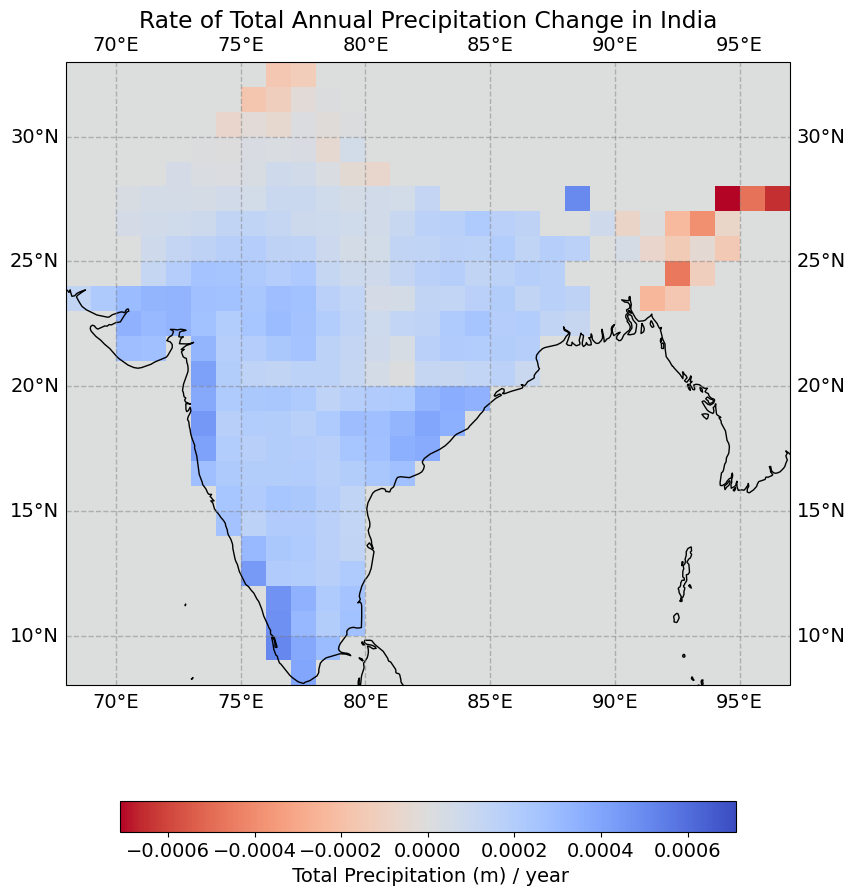

In [ ]:
# STRATEGY 2 - Plotting a map with rate of change of total precipitation

fig = plt.figure(figsize=(12, 10))                                              #establishes a figure and sets the size
ax = plt.axes(projection=ccrs.PlateCarree())                                    #sets up axes & turns the lon-lat into a flat map
ax.axes.add_feature(cf.COASTLINE)                                               #adds boundaries for the coastlines

## we learned this in the section above!-- added ax=ax and removed color bar so we can make a custom one (see below)
your_output = precip_clipped_annual.slope.plot(cmap = 'coolwarm_r', ax=ax, add_colorbar = False)

cb = plt.colorbar(your_output, fraction=0.04, orientation='horizontal')         #make a custom color bar that looks better than the default
cb.set_label(" Total Precipitation (m) / year")                                             #label the color bar including units
ax.set_aspect(1)                                                                #ensure that the axes are not out of proportion to one another
ax.set_title("Rate of Total Annual Precipitation Change in India")

#put in faint grid lines for reference
gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=1,
    color='gray',
    alpha=0.5,
    linestyle='--'
)


#### **c) Outside of Class :** In 4-5 sentences describe your approach and answer the posed question: How is precipitation/temperature changing over time in your country?

To examine how precipitation is changing over time, I first had to manipulate the given satellite data a bit. There would be a lot of granual seasonality if I plotted each month's precipitation totals for the range of years, so I instead added up the total precipitation for each year in India.

My first strategy was to plot these totals on a line graph and perform a linear fit to examine the underlying trend. My second strategy was to use the same regression I just ran but to plot the rate of change of precipitation per year on a map of India (similar to what we did in assignment 2).

The first strategy allowed me to numerically quantify how India's precipitation is changing over the past few decades. I see that — while there are a few dry spells and the graph shows a degree of seasonal rain variance — precipitation generally is slightly increasing in India by roughly 0.0515 cm per ten years.

The second strategy allows us to see exactly where this increase in precipitation is happening, which is mostly in the southern and northwestern coastal regions. This graph adds the important insight that even though total precipitation across the country is slowly increasing, there are also regions with heavy decreases in total rainfall, especially near West Bengal.

This speaks to the need of more granular data within specific locations in a country since the overall country data shows increasing precipitation levels, but we can see through the map that some places have a heavy uptick in precipitation while others still have a significant decrease.

#### **d)  Outside of Class:** Repeat the analysis (in the same country) for the other variable - precipitation or temperature. Then in 3-5 sentences describe the distribution of precipitation and temperature in the country and the impact it has for the communities living in various parts of the country. (3-5 sentences)

# Temperature

In [ ]:
# STRATEGY 1 - Using line plot/timeseries
temp_clipped_annual_avg = temp_precip_clipped.resample(time='YE').mean() # mean instead of sum since care more about average temperature

In [ ]:
# in this example we are using the data category 'temperature_2m'
# if you want to look at a different data category make sure to change this before running the code
your_data_grid = temp_clipped_annual_avg.temperature_2m.data.reshape((temp_clipped_annual_avg.temperature_2m.data.shape[0], np.prod(temp_clipped_annual_avg.temperature_2m.data.shape[1:]))) # makes the 2d grid into a column vector where each index of the column is a location on the map
your_time_series = pd.to_datetime(temp_clipped_annual_avg.time.data)                                                                            # pulls the time steps


temperature_2m_linear_fit, slope, intercept = linear_fit(your_time_series, your_data_grid)                                                           #makes linear fits for every location

# Add results back to temp_clipped_annual_avg
temp_clipped_annual_avg['slope'] = (("y", "x"), slope.reshape(temp_clipped_annual_avg.temperature_2m.data.shape[1:]))                                        # makes a new 'slope' dataset in the dataframe
temp_clipped_annual_avg['intercept'] = (("y", "x"), intercept.reshape(temp_clipped_annual_avg.temperature_2m.data.shape[1:]))                                # makes a new 'intercept' dataset in the dataframe
temp_clipped_annual_avg['temperature_2m_linear_fit'] = (("time", "y", "x"), temperature_2m_linear_fit.reshape(temp_clipped_annual_avg.temperature_2m.data.shape))                  # incorperates the predicted points into the dataframe

# pulls out the date range and reformats it to a useful format for printing
time_min = pd.to_datetime(your_time_series).min().strftime('%Y-%m')
time_max = pd.to_datetime(your_time_series).max().strftime('%Y-%m')

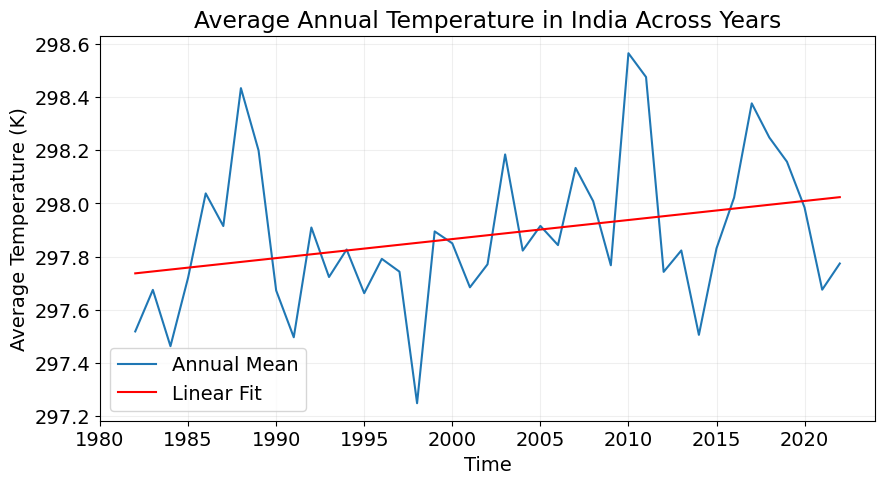

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
temp_clipped_annual_avg.temperature_2m.mean(dim = ['x','y']).plot(ax=ax, label = 'Annual Mean')
temp_clipped_annual_avg.temperature_2m_linear_fit.mean(dim = ['x','y']).plot(ax=ax, color='red', label = 'Linear Fit') #plot linear fit
ax.grid(True, alpha=0.2)                        #sets a grid on your plot
ax.set_ylabel("Average Temperature (K)")  #sets labels on your y axis
ax.set_xlabel("Time")   #sets labels on your x axis
ax.set_title("Average Annual Temperature in India Across Years")
ax.legend()

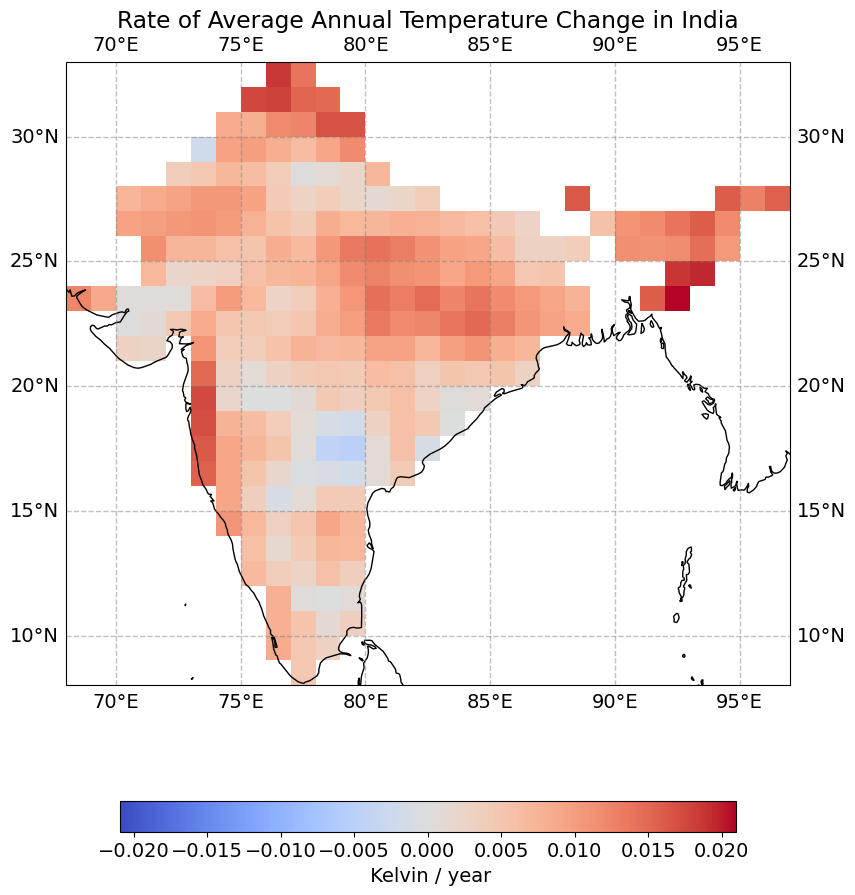

In [ ]:
# STRATEGY 2 - Plotting a map with rate of change of total precipitation

fig = plt.figure(figsize=(12, 10))                                              #establishes a figure and sets the size
ax = plt.axes(projection=ccrs.PlateCarree())                                    #sets up axes & turns the lon-lat into a flat map
ax.axes.add_feature(cf.COASTLINE)                                               #adds boundaries for the coastlines

## we learned this in the section above!-- added ax=ax and removed color bar so we can make a custom one (see below)
your_output = temp_clipped_annual_avg.slope.plot(cmap = 'coolwarm', ax=ax, add_colorbar = False)

cb = plt.colorbar(your_output, fraction=0.04, orientation='horizontal')         #make a custom color bar that looks better than the default
cb.set_label(" Kelvin / year")                                             #label the color bar including units
ax.set_aspect(1)                                                                #ensure that the axes are not out of proportion to one another
ax.set_title("Rate of Average Annual Temperature Change in India")

#put in faint grid lines for reference
gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=1,
    color='gray',
    alpha=0.5,
    linestyle='--'
)

We can see generally that India is trending toward more extreme weather events, whether that is more/less precipitation or hotter temperatures. There is increasingly more precipitation in coastal cities, which we are seeing in places like Punjab, Himachal Pradesh, Jammu, and Kashmir all experiencing dangerous flooding in the most recent monsoon season (2025). And there is increasingly less rainfall and droughts in regions like West Bengal and Rajasthan, so just more extreme precipitation levels in general.

And it is increasingly more hot in northern and western parts of the country (where it has typically been less hot), which was directly felt by local communities through deadly heat waves. The ones in 2022 near Pakistan are one of the most notable, breaking heat records in the nation's history.

#### **3) HOW IS CLIMATE CHANGE IMPACTING PRECIPITATION AND TEMPERATURE GLOBALLY?**


#### **1)** You have access to a dataset providing precipitation and temperature from 1981-2021. You have completed Assignments 1 and 2, so have an understanding of changes in the atmosphere driving climate change.  We want you to design a workflow to analyze and visualize the precipitation and temperature data to determine what impact, if any, climate change is having. Think about all the tools we have in our toolbox -- from creating and plotting a timeseries, finding trends, and making maps. There is no correct answer, as long as you can justify your steps!


#### **a)** In a text box below, list the various steps of your workflow and explain, for each step, the purpose of the step and/or what you hope to learn from the step.

To understand the impact that climate change is having on precipitation and temperature, we need to zoom out from India to examine trends on a larger planetary scale.

I am going to repeat my analysis for India (1. creating a time series line chart and 2. a rate of change map) but this time with the global data from the satellite to understand how temperature and precipitation is changing across the globe.

Looking at this over time and over a larger period of time will help us see how India is not singular in terms of increasing extreme weather events. Climate change, which effects everyone around the world, is causing temperatures and precipitation levels to change globally, which hopefully this analysis will reveal.

#### **b)** Now proceed, using your notebook to implement your workflow, pasting in and modifying (as needed) the code from ToolBox, and generating any useful plots/*maps*.

In [ ]:
global_temp_avg = temp_precip_data.resample(time='YE').mean()

In [ ]:
# in this example we are using the data category 'temperature_2m'
# if you want to look at a different data category make sure to change this before running the code
your_data_grid = global_temp_avg.temperature_2m.data.reshape((global_temp_avg.temperature_2m.data.shape[0], np.prod(global_temp_avg.temperature_2m.data.shape[1:]))) # makes the 2d grid into a column vector where each index of the column is a location on the map
your_time_series = pd.to_datetime(global_temp_avg.time.data)                                                                            # pulls the time steps


temperature_2m_linear_fit, slope, intercept = linear_fit(your_time_series, your_data_grid)                                                           #makes linear fits for every location

# Add results back to global_temp_avg
global_temp_avg['slope'] = (("y", "x"), slope.reshape(global_temp_avg.temperature_2m.data.shape[1:]))                                        # makes a new 'slope' dataset in the dataframe
global_temp_avg['intercept'] = (("y", "x"), intercept.reshape(global_temp_avg.temperature_2m.data.shape[1:]))                                # makes a new 'intercept' dataset in the dataframe
global_temp_avg['temperature_2m_linear_fit'] = (("time", "y", "x"), temperature_2m_linear_fit.reshape(global_temp_avg.temperature_2m.data.shape))                  # incorperates the predicted points into the dataframe

# pulls out the date range and reformats it to a useful format for printing
time_min = pd.to_datetime(your_time_series).min().strftime('%Y-%m')
time_max = pd.to_datetime(your_time_series).max().strftime('%Y-%m')

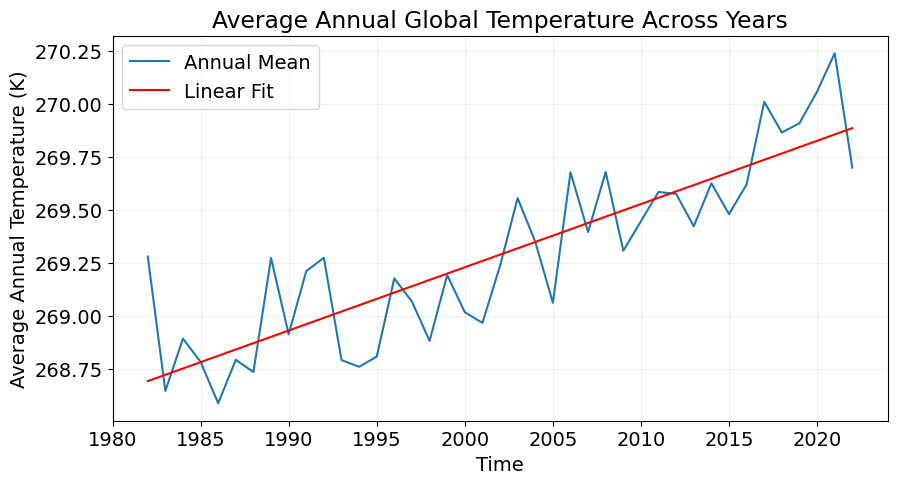

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
global_temp_avg.temperature_2m.mean(dim = ['x','y']).plot(ax=ax, label = 'Annual Mean')
global_temp_avg.temperature_2m_linear_fit.mean(dim = ['x','y']).plot(ax=ax, color='red', label = 'Linear Fit') #plot linear fit
ax.grid(True, alpha=0.2)                        #sets a grid on your plot
ax.set_ylabel("Average Annual Temperature (K)")  #sets labels on your y axis
ax.set_xlabel("Time")   #sets labels on your x axis
ax.set_title("Average Annual Global Temperature Across Years")
ax.legend()

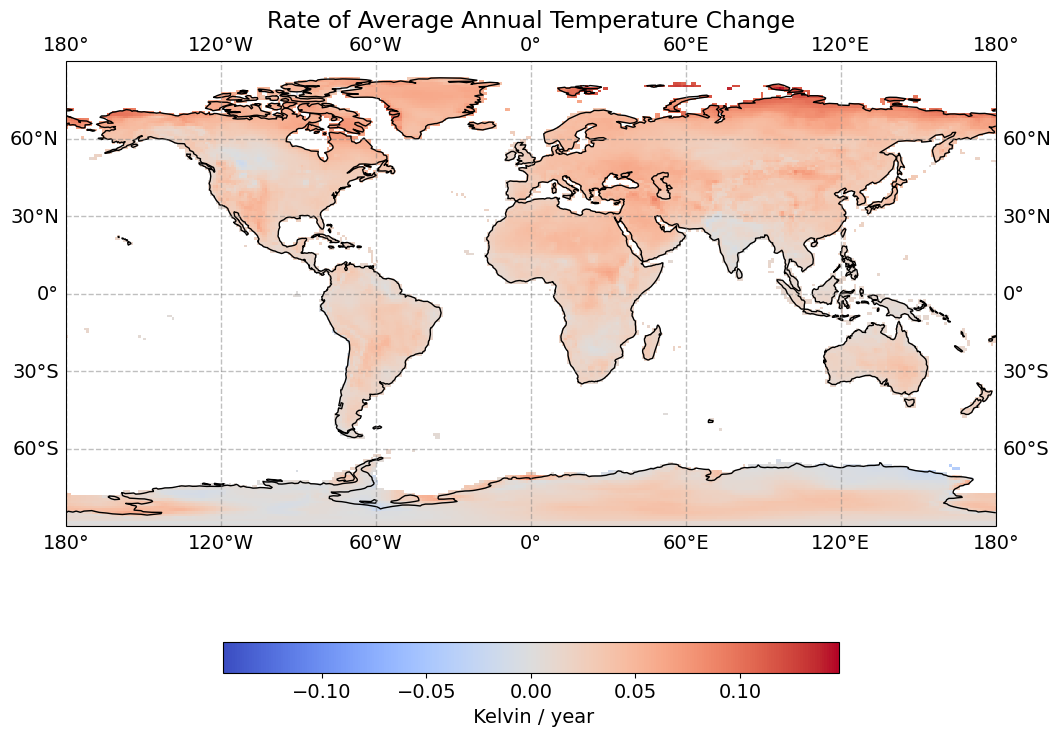

In [ ]:

fig = plt.figure(figsize=(12, 10))                                              #establishes a figure and sets the size
ax = plt.axes(projection=ccrs.PlateCarree())                                    #sets up axes & turns the lon-lat into a flat map
ax.axes.add_feature(cf.COASTLINE)                                               #adds boundaries for the coastlines

## we learned this in the section above!-- added ax=ax and removed color bar so we can make a custom one (see below)
your_output = global_temp_avg.slope.plot(cmap = 'coolwarm', ax=ax, add_colorbar = False)

cb = plt.colorbar(your_output, fraction=0.04, orientation='horizontal')         #make a custom color bar that looks better than the default
cb.set_label(" Kelvin / year")                                             #label the color bar including units
ax.set_aspect(1)                                                                #ensure that the axes are not out of proportion to one another
ax.set_title("Rate of Average Annual Temperature Change")

#put in faint grid lines for reference
gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=1,
    color='gray',
    alpha=0.5,
    linestyle='--'
)

In [ ]:
global_precip_total = temp_precip_data.resample(time='YE').sum()

In [ ]:
# in this example we are using the data category 'total_precipitation'
# if you want to look at a different data category make sure to change this before running the code
your_data_grid = global_precip_total.total_precipitation.data.reshape((global_precip_total.total_precipitation.data.shape[0], np.prod(global_precip_total.total_precipitation.data.shape[1:]))) # makes the 2d grid into a column vector where each index of the column is a location on the map
your_time_series = pd.to_datetime(global_precip_total.time.data)                                                                            # pulls the time steps


total_precipitation_linear_fit, slope, intercept = linear_fit(your_time_series, your_data_grid)                                                           #makes linear fits for every location

# Add results back to global_precip_total
global_precip_total['slope'] = (("y", "x"), slope.reshape(global_precip_total.total_precipitation.data.shape[1:]))                                        # makes a new 'slope' dataset in the dataframe
global_precip_total['intercept'] = (("y", "x"), intercept.reshape(global_precip_total.total_precipitation.data.shape[1:]))                                # makes a new 'intercept' dataset in the dataframe
global_precip_total['total_precipitation_linear_fit'] = (("time", "y", "x"), total_precipitation_linear_fit.reshape(global_precip_total.total_precipitation.data.shape))                  # incorperates the predicted points into the dataframe

# pulls out the date range and reformats it to a useful format for printing
time_min = pd.to_datetime(your_time_series).min().strftime('%Y-%m')
time_max = pd.to_datetime(your_time_series).max().strftime('%Y-%m')

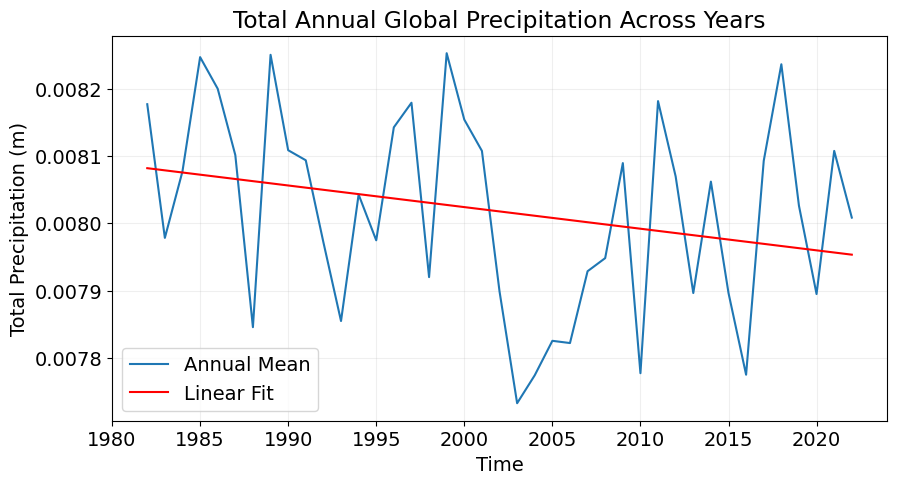

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
global_precip_total.total_precipitation.mean(dim = ['x','y']).plot(ax=ax, label = 'Annual Mean')
global_precip_total.total_precipitation_linear_fit.mean(dim = ['x','y']).plot(ax=ax, color='red', label = 'Linear Fit') #plot linear fit
ax.grid(True, alpha=0.2)                        #sets a grid on your plot
ax.set_ylabel("Total Precipitation (m)")  #sets labels on your y axis
ax.set_xlabel("Time")   #sets labels on your x axis
ax.set_title("Total Annual Global Precipitation Across Years")
ax.legend()

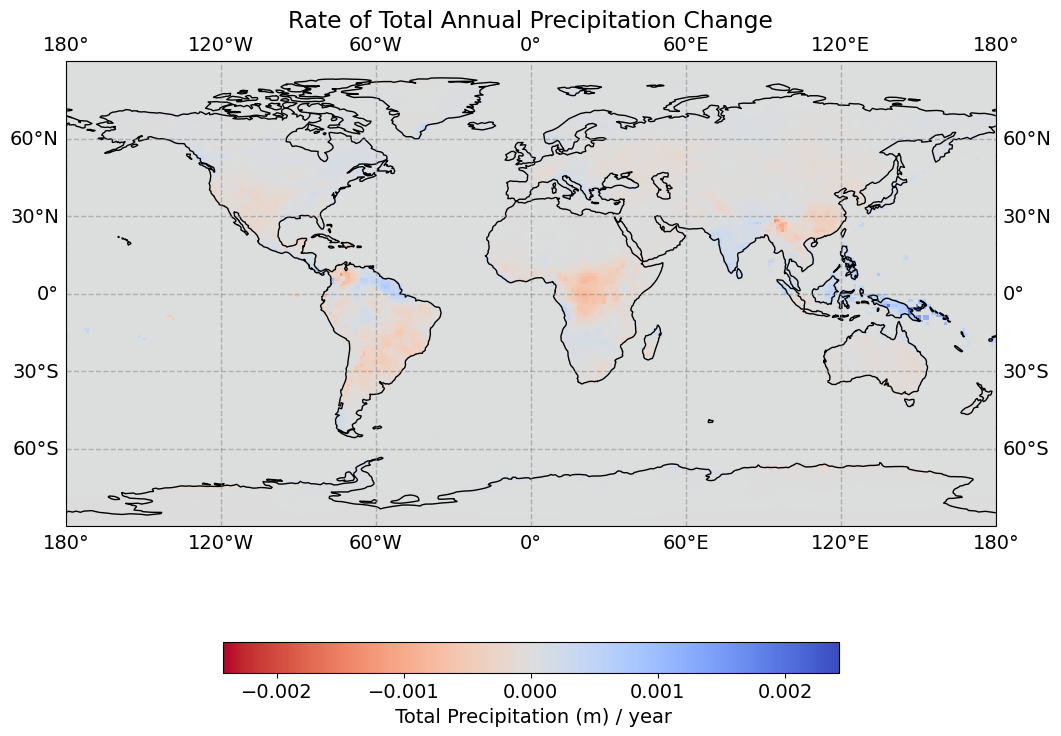

In [ ]:

fig = plt.figure(figsize=(12, 10))                                              #establishes a figure and sets the size
ax = plt.axes(projection=ccrs.PlateCarree())                                    #sets up axes & turns the lon-lat into a flat map
ax.axes.add_feature(cf.COASTLINE)                                               #adds boundaries for the coastlines

## we learned this in the section above!-- added ax=ax and removed color bar so we can make a custom one (see below)
your_output = global_precip_total.slope.plot(cmap = 'coolwarm_r', ax=ax, add_colorbar = False)

cb = plt.colorbar(your_output, fraction=0.04, orientation='horizontal')         #make a custom color bar that looks better than the default
cb.set_label(" Total Precipitation (m) / year")                                             #label the color bar including units
ax.set_aspect(1)                                                                #ensure that the axes are not out of proportion to one another
ax.set_title("Rate of Total Annual Precipitation Change")

#put in faint grid lines for reference
gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=1,
    color='gray',
    alpha=0.5,
    linestyle='--'
)

#### **c)** In a text cell below, summarize (< 1/4 page) the key observation about changes in precipitation in the period 1981-2021? Please include – are there specific regions or time periods where more change is seen?


Here, we can see how the world data actually differs from India's precipitation data. The linear fit shows actually a decrease in overall total precipitation. However, because there is so much variation throughout the year, I don't necessarily have full confidence in the linear fit.

But, ultimately, the variation speaks to how there is generally more extreme precipitation events in the world, which is a direct cause of climate change. We can see how the map supports this claim since places like Central Africa, Southeast Asia, and South America are seeing much less rainfall while countries like India and Indonesia are seeing a lot more. This has meant excessive flooding in a lot of areas and increasingly droughts in others, which significantly harms communities. The time series reveals a relative downtick in precipitation around 2003, but it is nothing drastic.

Ultimately, this global trend can be attributed to climate change. Generally, warming temperatures mean more evaporation, which not only makes some regions more dry and susceptible to droughts/wildfires but also warms the atmosphere, which creates for more extreme downpours.

#### **d)** In a text cell below, summarize (< 1/4 page) the key observation about changes in temperature in the period 1981-2021? Please include - are there specific regions or time periods where more change is seen?

Unlike the precipitation data, where some regions are experiencing more rainfall and others significantly less, the world as a whole is just getting hotter.

The linear fit on the timeseries is much more convincing and shows a significant uptick in temperature across the globe in the past few decades. There aren't many notable time periods in particular - besides normal fluctuations - but I thought it was interesting that global temperatures seemed to have gone down during Covid, which can likely be due to the fact that we were producing less emissions during lockdown.

But still, the underlying and undeniable trend is that the world is warming. The map shows almost an entire blanket of red across the world, signifying increasing temperatures across the globe. Noteable places include regions near the north pole which are increasing in temperature at a faster rate (i.e., melting glaciers) and also some areas in South/East Asia that don't seem to be increasing in temperature all that much.

This is ultimately again a direct indicator of climate change caused by human activities like burning fossil fuels that release heat-trapping greenhouse gases.

### **2)** How are the changes in precipitation and temperature introducing sustainability challenges in different regions? How are human activities amplifying the negative impacts? How could human activities mitigate the negative effects? Discuss this – no more than 1 page total – under the headings of environmental, economic, and social. Feel free to use reference material - peer reviewed, popular press, or Wikipedia - available through the internet.


We can see that changes in temperatures and precipitation are introducing sustainability challenges across the world.

**Environmental:**

Temperature and precipitation changes are damaging the intregrity of ecological systems that support biodiversity across the world. Specifically, rising global temperatures increase evapotranspiration. This intensifies droughts and distrubs the terrestrial water cycle, which not only harms the plants that are a part of this cycle and rely on the water for sustenance, but also the animals which rely on these plants; and temperature changes throw off species' migration cycles and potentially cause species decline (e.g., polar bears with melting ice caps).

Altered rainfall patterns also disrupt freshwater and terrestrial ecosystems. In tropical regions, heavier rainfall leads to flooding and erosion, reducing soil fertility and the stability of forests. Conversely, in subtropical and semi-arid regions, reduced rainfall contributes to desertification, loss of vegetation cover, and soil degradation.

**Economic:**

Also, changes in temperature and precipitation directly affect the productivity of agriculture production, water availability, and infrastructure, which are cornerstones of economies across the globe. In agriculture, more erratic rainfall and higher temperatures reduce crop yields and livestock productivty, which decreases supply and makes communities susceptible to food insecurity.

Natural disasters from increased precipitation (like flooding/hurricanes) not only cause millions of dollars in damanges, but also threaten supply chain issues. Finally, increasingly insurance costs are rising within frontline communities that are experiencing more natural disasters, which leave homes uninsured and at risk.

**Social:**

Finally, on top of changing economic systems, shifting temperature and precipitation patterns have social implications too. Specifcally, marginalized communities bear the brunt of climate-driven resource stress. Droughts and failed harvests can lead to food insecurity, while floods and storms destroy homes and displace communities. What's more, more evapotranspiration from increasing temperatures means that rural communities typically reliant on groundwater can no longer access this for clean water; and drought-related deaths are on the rise across the world, especially in Europe. Climate change in general reveals the underlying inequalities in our societies and exacerbates them: wealthier communities can adapt through technology and insurance, whereas poorer populations may be forced to migrate or worse.

_____
Ultimately, human activities are amplifying these negative impacts on environmental, economic, and social sustainability. We are accelerating greenhouse gas emissions, deforestation, and unsustainable land and water use, which intensify global warming and disrupt rainfall patterns. Poorly planned urban development put communities at risk when faced with extreme weather events like floods. And, overextraction of groundwater and pollution also contribute to diminishing access to clean water, especially when coupled with less precipitation and higher temperatures. This is just to name a few examples.

However, human activities can also help mitigate these negative impacts. We are increasingly shifting to renewable energy (less reliance on burning of fossil fuels), restoring forests and wetlands, and building climate-resilient infrastructure. Policy is also really crucial in ensuring that adaptation resources reach frontline communities, which are often the most prone to climate-related extreme natural/weather events. We certainly have a long way to go for equitable and effective climate mitigation/adaptation, but it is important to also acknowledge how we have gotten the ball rolling through global cooperation and collective action in some key areas.